In [104]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import iv
plt.style.use('fast')

## Question (b)

In [105]:
T  = 10; dt = 0.1; N = int(T/dt); Lambda = 1
t  = [j * dt for j in range(0, N + 1)]
xM = []  # Saves all trajectories
M  = 100 # Number of trajectories

# M trajectories are computed
for n in range(0, M):
    x  = [0] # Position vector
    for i in range(0, N):
        p = np.random.uniform(0, 1)
        if (0 <= p and p < Lambda*dt/2): 
            x.append(x[i] - 1) # Move right
        elif(Lambda*dt/2 <= p and p < Lambda*dt): 
            x.append(x[i] + 1) # Move left
        else:                               
            x.append(x[i] - 0) # Pause
    xM.append(x)
    del x

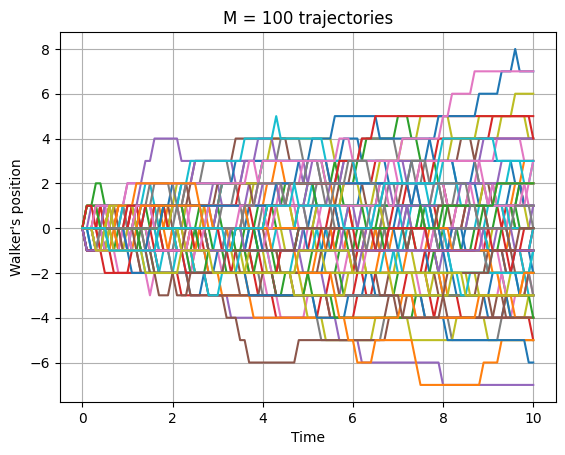

In [106]:
for i in range(0 , M):
    plt.plot(t, xM[i])
plt.xlabel('Time')
plt.ylabel('Walker\'s position')
plt.title(f'M = {M} trajectories')
plt.grid(True)

## Question (c):
Now, I consider M = 10_000, to get more meaningful histograms.

In [107]:
T  = 10; dt = 0.1; N = int(T/dt); Lambda = 1
t  = [j * dt for j in range(0, N + 1)]
xM = []    # Saves all trajectories
M  = 10_000 # Number of trajectories

# M trajectories are computed
for n in range(0, M):
    x  = [0] # Position vector
    for i in range(0, N):
        p = np.random.uniform(0, 1)
        if (0 <= p and p < Lambda*dt/2): 
            x.append(x[i] - 1) # Move right
        elif(Lambda*dt/2 <= p and p < Lambda*dt): 
            x.append(x[i] + 1) # Move left
        else:                               
            x.append(x[i] - 0) # Pause
    xM.append(x)
    del x

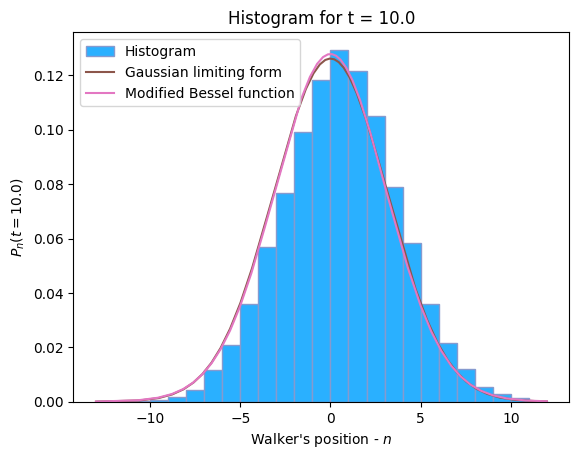

In [108]:
# Creating histogram: t = 10.0
n_bins = 25
hist, bins, _ = plt.hist([xM[i][-1] for i in range(len(xM))], density = True, bins = n_bins, label = 'Histogram',
                         facecolor = '#2ab0ff', edgecolor='#869acf', linewidth=1)

x = np.linspace(bins.min(), bins.max(), 1_000)
y = 1/np.sqrt(2 * np.pi * t[-1]) * np.exp(-x**2/(2 * t[-1]))
plt.plot(x, y, label = 'Gaussian limiting form', color = 'C5')
plt.plot(x, np.exp(-t[-1]) * iv(abs(x), t[-1]), label = 'Modified Bessel function', color = 'C6')
plt.xlabel(f'Walker\'s position - $n$')
plt.ylabel(f'$P_n(t = {t[-1]})$')
plt.title(f'Histogram for t = {t[-1]}')
plt.legend()
plt.show()

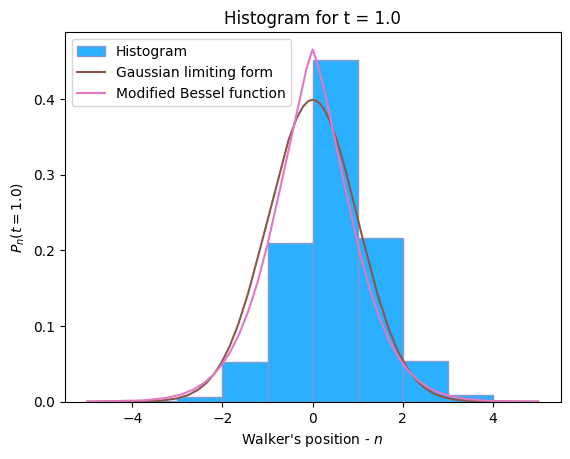

In [109]:
# Creating histogram: t = 1.0
n_bins = 10
hist, bins, _ = plt.hist([xM[i][10] for i in range(len(xM))], density = True, bins = n_bins, label = 'Histogram',
                         facecolor = '#2ab0ff', edgecolor='#869acf', linewidth=1)

x = np.linspace(bins.min(), bins.max(), 1_000)
y = 1/np.sqrt(2 * np.pi * t[10]) * np.exp(-x**2/(2 * t[10]))
plt.plot(x, y, label = 'Gaussian limiting form', color = 'C5')
plt.plot(x, np.exp(-t[10]) * iv(abs(x), t[10]), label = 'Modified Bessel function', color = 'C6')
plt.xlabel(f'Walker\'s position - $n$')
plt.ylabel(f'$P_n(t = {t[10]})$')
plt.title(f'Histogram for t = {t[10]}')
plt.legend()
plt.show()

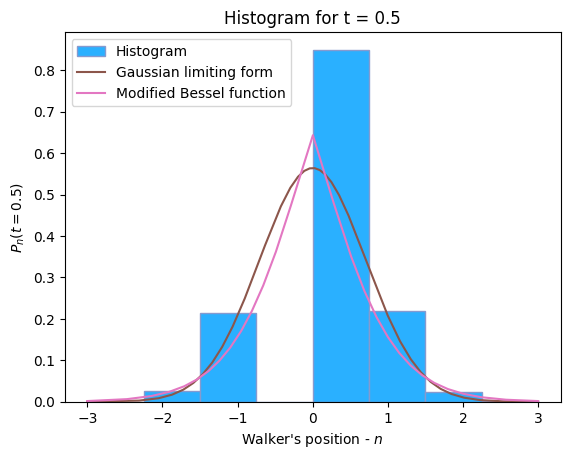

In [110]:
# Creating histogram: t = 0.5
n_bins = 8
hist, bins, _ = plt.hist([xM[i][5] for i in range(len(xM))], density = True, bins = n_bins, label = 'Histogram',
                         facecolor = '#2ab0ff', edgecolor='#869acf', linewidth=1)

x = np.linspace(bins.min(), bins.max(), 1_000)
y = 1/np.sqrt(2 * np.pi * t[5]) * np.exp(-x**2/(2 * t[5]))
plt.plot(x, y, label = 'Gaussian limiting form', color = 'C5')
plt.plot(x, np.exp(-t[5]) * iv(abs(x), t[5]), label = 'Modified Bessel function', color = 'C6')
plt.xlabel(f'Walker\'s position - $n$')
plt.ylabel(f'$P_n(t = {t[5]})$')
plt.title(f'Histogram for t = {t[5]}')
plt.legend()
plt.show()

### d) Bonus question:

In [111]:
T      = 10;  dt = 0.1; N = int(T/dt); Lambda = 1
t      = [j * dt for j in range(0, N + 1)]
xM     = []     # Saves all trajectories
M      = 10_000 # Number of trajectories
R_t    = []

# M trajectories are computed
for n in range(0, M):
    x  = [0] # Position vector
    for i in range(0, N):
        p = np.random.uniform(0, 1)
        if (0 <= p and p < Lambda*dt/2): 
            x.append(x[i] - 1) # Move right
            if(((x[i] - 1) == 0) and (x[i] != 0)):
                R_t.append(t[i + 1])
                break
        elif(Lambda*dt/2 <= p and p < Lambda*dt): 
            x.append(x[i] + 1) # Move left
            if(((x[i] + 1) == 0) and (x[i] != 0)):
                R_t.append(t[i + 1])
                break
        else:                               
            x.append(x[i] - 0) # Pause
    xM.append(x)
    del x

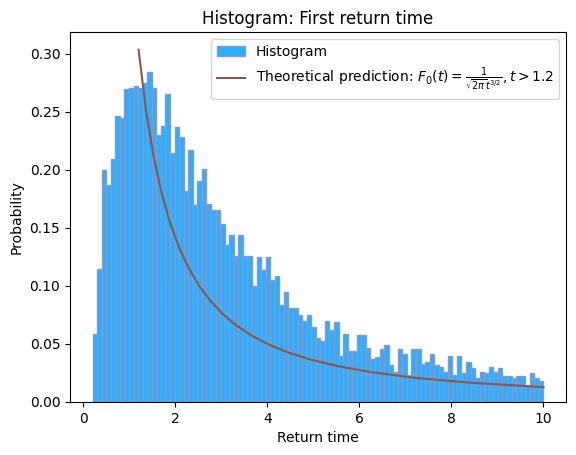

In [121]:
# Creating histogram: Return times
n_bins = 99
hist, bins, _ = plt.hist(R_t, density = True, bins = n_bins, label = 'Histogram',
                         facecolor = '#2ab0ff', edgecolor='#869acf', linewidth=1)

tVec = np.linspace(bins.min() + 1, bins.max(), 1_000)
y = 1./(np.sqrt(2.*np.pi) * tVec**(3./2.))
plt.plot(tVec, y, label = r'Theoretical prediction: $F_0(t) = \frac{1}{\sqrt{2\pi}t^{3/2}}, t > $' + f'{bins.min() + 1}', color = 'C5')
plt.xlabel(f'Return time')
plt.ylabel(f'Probability')
plt.title(f'Histogram: First return time')
plt.legend()
plt.show()